Importing the Library

In [553]:
import pandas as pd

Importing the dataset

In [554]:
data = pd.read_csv("C:\\users\\Yogendra Chand\\OneDrive\\Desktop\\heart.csv")

Finding Missing values

In [555]:
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Observing the Duplicate values

In [556]:
data_dup = data.duplicated().any()

In [557]:
data_dup

True

In [558]:
data = data.drop_duplicates()

In [559]:
data_dup = data.duplicated().any()

In [560]:
data_dup

False

Data Processing

In [561]:
cate_val =[]
cont_val =[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [562]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [563]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Encoding categorical data

In [564]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [565]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [566]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

Feature Scaling

In [567]:
data.head()


,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [568]:
from sklearn.preprocessing import StandardScaler

In [569]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [570]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Splitting the dataset into Training and Test Set

In [571]:
X = data.drop('target',axis=1)

In [572]:
y =  data['target']

In [573]:
from sklearn.model_selection import train_test_split

In [574]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Logistic Regression

In [575]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [576]:
from sklearn.linear_model import LogisticRegression

In [577]:
log = LogisticRegression()
log.fit(X_train,y_train)


LogisticRegression()

In [578]:
y_pred1 = log.predict(X_test)

In [579]:
from sklearn.metrics import accuracy_score

In [580]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

SVC

In [581]:
from sklearn import svm

In [582]:
svm = svm.SVC()

In [583]:
svm.fit(X_train,y_train)

SVC()

In [584]:
y_pred2 = svm.predict(X_test)

In [585]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

KNeighbors Classifier

In [586]:
from sklearn.neighbors import KNeighborsClassifier

In [587]:
knn = KNeighborsClassifier()

In [588]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [589]:
y_pred3 = knn.predict(X_test)

In [590]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [591]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [592]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

Non-Linear ML Algorithms

In [593]:
data = pd.read_csv('C:\\users\\Yogendra Chand\\OneDrive\\Desktop\\heart.csv')

In [594]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [595]:
data = data.drop_duplicates()

In [596]:
data.shape

(302, 14)

In [597]:
X = data.drop('target',axis=1)
y = data['target']

In [598]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Decision Tree Classifier

In [599]:
from sklearn.tree import DecisionTreeClassifier

In [600]:
dt = DecisionTreeClassifier()

In [601]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [602]:
y_pred4=dt.predict(X_test)

In [603]:
accuracy_score(y_test,y_pred4)

0.7540983606557377

Random Forest Classifier

In [604]:
from sklearn.ensemble import RandomForestClassifier

In [605]:
rf = RandomForestClassifier()

In [606]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [607]:
y_pred5= rf.predict(X_test)

In [623]:
accuracy_score(y_test,y_pred)

0.8032786885245902

Gradient Boosting Classifier

In [624]:
from sklearn.ensemble import GradientBoostingClassifier

In [625]:
gbc = GradientBoostingClassifier()

In [626]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [627]:
y_pred6 = gbc.predict(X_test)

In [628]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [629]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),
                                  accuracy_score(y_test,y_pred6)]})

In [630]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.754098
4,RF,0.803279
5,GB,0.803279


<BarContainer object of 6 artists>

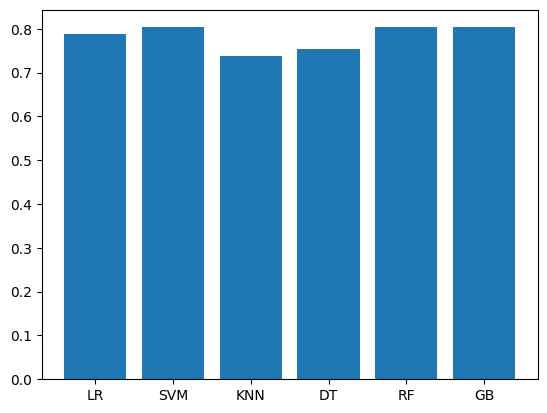

In [649]:
import matplotlib.pyplot as plt
x_axis = list(final_data['Models'])
y_axis = list(final_data['ACC'])
plt.bar(x_axis, y_axis)

In [650]:
x=data.drop('target',axis=1)
y=data['target']

In [651]:
x.shape

(302, 13)

In [652]:
from sklearn.ensemble import RandomForestClassifier

In [653]:
rf=RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [654]:
import pandas as pd

In [655]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3
},index=[0])

In [656]:
new_data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [657]:
p=rf.predict(new_data)
if p[0]==0:
    print("NO disease")
else:
    print("disease")

NO disease


Save model using Joblib

In [658]:
import joblib

In [659]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [660]:
model=joblib.load('model_joblib_heart')

In [661]:
model.predict(new_data)

array([0], dtype=int64)

In [662]:
from tkinter import*
import joblib

In [663]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\Users\Yogendra Chand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
